<a href="https://colab.research.google.com/github/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Intervalos_de_confianza_y_Test_Pearson_de_comparaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar bibliotecas y funciones 


##Bibliotecas

In [23]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

## intervalo_confianza_bernoulli()

In [30]:
def intervalo_confianza_bernoulli(tam_muestra, p_muestra , nivel_confianza):
  '''p es la probabilidad obtenida en la muestra
     nivel de confianza debe estar entre 0 y 1'''
  izq = 1 - nivel_confianza/2
  z_score = - stats.norm.ppf(izq)
  margen_error = z_score/(2*math.sqrt(tam_muestra))
  v_inf = p_muestra - margen_error
  v_sup = p_muestra + margen_error
  print('Con probabilidad de 95% P_poblacion está en el intervalo:',
      round(v_inf,4), round(v_sup,4))
  return margen_error

## test_chi_cuadrada()

In [43]:
def test_chi_cuadrada(observados,esperados):
    """Prueba de chi cuadrada para 12 grados de libertad (P-val=0.05)."""
    chi2 = 0  
    for observado, esperado in zip(observados,esperados):
        chi_cuadrada = math.pow(observado - esperado, 2)
        chi2 += chi_cuadrada / esperado

    print("\nTest Chi-squared  estdístico = {:.3f}".format(chi2))
    print("Valor crítico P-value para 0.05 de significancia is 21.03.")    
    return chi2 <= 21.03

# Intervalos de confianza para una Ley  Bernoulli

¿De qué tamaño tiene que ser mi muestra?
 1. Que nivel de confianza quieres tener
 2. Qué tan preciso quieres que sea tu estimador


**Cálculo del error**

$\epsilon \leq \cfrac{z_{score}}{2\sqrt{n}}$

Para un nivel de confianza de 95%

$ \epsilon \leq \cfrac{1.96}{2\sqrt{n}}\leq \cfrac{1}{\sqrt{n}}$

In [4]:
n =400
p_muestra = 0.5
margen_error = 1/math.sqrt(n)
v_inf = p_muestra - margen_error
v_sup = p_muestra + margen_error

print('Probabilidad de 95%  que P está en el intervalo:',
      round(v_inf,4), round(v_sup,4))

Probabilidad de 95%  que P está en el intervalo: 0.45 0.55


## Ejemplo 1 

In [29]:
#Obtener una muestra de n numeros con distribución bernouli

P_poblacion = 0.3  
tam_muestra=100
muestra = stats.bernoulli.rvs(size = tam_muestra, p = P_poblacion)
p_muestra = muestra.sum()/len(muestra)

print('Elementos de la muestra son: \n{}\n\np_muestra: {}'.format(muestra, 
                                                          p_muestra))

Elementos de la muestra son: 
[0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1]

p_muestra: 0.29


In [31]:
a = intervalo_confianza_bernoulli(tam_muestra, p_muestra, nivel_confianza=.95)

Con probabilidad de 95% P_poblacion está en el intervalo: 0.2931 0.2869


## Ejemplo 2

Construir el intervalo de confianza de que a una persona que solicita un crédito, éste le sea otorgado.

Para ello, suponer que es una muestra sana (iid)

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana1/loan_prediction.csv')
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
n = 422 + 192
p = 422/n

print ('n = {}, \np = {}'.format(n, p))

n = 614, 
p = 0.6872964169381107


In [39]:
a = intervalo_confianza_bernoulli(tam_muestra=n, p_muestra=p, nivel_confianza=.95)

Con probabilidad de 95% P_poblacion está en el intervalo: 0.6877 0.6869


# Test de pearson de comparación

## Distribución Chi Cuadrada

In [11]:
def grafica_chi_cuadrada(a, b, c, d):
  x = np.linspace(0, 10, 100)
  fig,ax = plt.subplots(1,1)
  linestyles = [':', '--', '-.', '-']
  grados_libertad = [a, b, c, d]
  for df, ls in zip(grados_libertad, linestyles):
    ax.plot(x, stats.chi2.pdf(x, df),  linestyle=ls)

  plt.xlim(0, 10)
  plt.ylim(0, 0.4)

  plt.xlabel('valores')
  plt.ylabel('frecuencia')
  plt.title('Distribución Chi cuadrada')

  plt.legend(grados_libertad )
  plt.show()

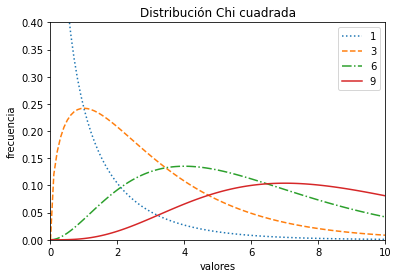

In [40]:
grafica_chi_cuadrada(1, 3, 6, 9)

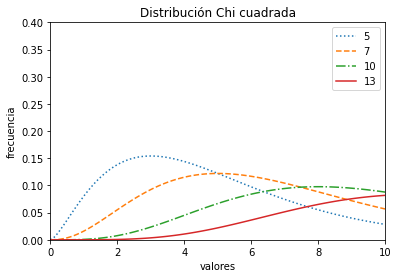

In [42]:
grafica_chi_cuadrada(5, 7, 10, 13)

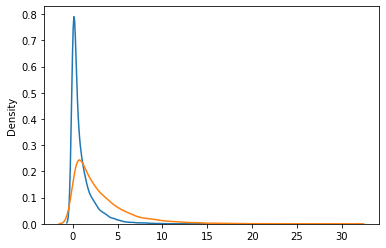

In [14]:
X1 = np.random.normal(0, 1, 10000)
X2 = np.random.normal(0, 1, 10000)
X3 = np.random.normal(0, 1, 10000)
sns.kdeplot(x=X1**2)
sns.kdeplot(x=(X1**2)+(X3**2)+(X3**2))

## Ejemplo:

Geisser realizó un estudio en 1889 de la distribución de hijos e hijas en las familias en Saxony con 12 hijos.
Se deseaba probar que la probabilidad de tener un hijo varon  es de 0.52


In [15]:
datos = pd.read_csv('https://www.stat.berkeley.edu/~rice/Stat135/geissler.txt')
datos.columns=['hijos_h','frec_observada']
datos

,hijos_h,frec_observada
0,0,7
1,1,45
2,2,181
3,3,478
4,4,829
5,5,1112
6,6,1343
7,7,1033
8,8,670
9,9,286


In [17]:
n = datos.frec_observada.sum()
n

6115

# Prueba de Hipótesis


Hipotesis nula:
- la Ley de Probabilidad sigue una distribución Binomial (12, 0.52) 
(número de éxitos r en n eventos independientes sucesivos)

Hipotesis alternativa:
- La Ley de Probabilidad es cualquier otra

In [19]:
## Valores esperados de la hipotesis nula
frec_esperada=[]
for r in range(0,13):
  f_e= stats.binom.pmf(r, 12, .52) * n
  frec_esperada.append(int(round(f_e,0)))

datos['frec_esperada']=pd.Series(frec_esperada)
datos

,hijos_h,frec_observada,frec_esperada
0,0,7,1
1,1,45,12
2,2,181,71
3,3,478,256
4,4,829,624
5,5,1112,1081
6,6,1343,1366
7,7,1033,1269
8,8,670,859
9,9,286,414


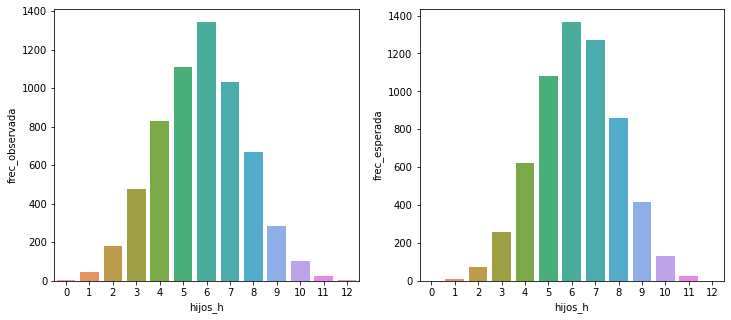

In [20]:
variables= ['frec_observada', 'frec_esperada']
fig, ax = plt.subplots(1,2, figsize=(12, 5))
for var, subplot in zip(variables, ax.flatten()):
  sns.barplot(x='hijos_h', y=var, data = datos, ax= subplot)
plt.show()

In [44]:
test_chi_cuadrada(datos['frec_observada'], datos['frec_esperada'])


Test Chi-squared  estdístico = 690.731
Valor crítico P-value para 0.05 de significancia is 21.03.


False

In [22]:
stats.chisquare(datos['frec_observada'], datos['frec_esperada'], ddof=12 )

Power_divergenceResult(statistic=690.7313910429208, pvalue=nan)

# Recursos

* https://seeing-theory.brown.edu/frequentist-inference/index.html

* https://rpsychologist.com/d3/ci/